In [1]:
from rocketpy import Environment, SolidMotor, Rocket, Flight
import datetime

%matplotlib notebook
%matplotlib inline

In [2]:
# help(Environment)

In [3]:
Env = Environment(
    railLength=5,
    longitude=37.0144, # East
    latitude=-1.1018, # South
)

tomorrow = datetime.datetime.today() + datetime.timedelta(days=1)

Env.setDate((tomorrow.year, tomorrow.month, tomorrow.day, 16)) 

Env.setAtmosphericModel(type='Forecast', file='GFS')

C:\Users\0x6f736f646f\OneDrive\Documents\Nakuja\airframeN2\Venv\lib\site-packages\rocketpy\Environment.py:1831: UserWarning: Exact chosen launch time is not available in the provided file, using 2022-03-17 15:00:00 UTC instead.
  warnings.warn(


Gravity Details

Acceleration of Gravity: 9.80665 m/s²


Launch Site Details

Launch Rail Length: 5  m
Launch Date: 2022-03-17 16:00:00 UTC
Launch Site Latitude: -1.10180°
Launch Site Longitude: 37.01440°
Launch Site Surface Elevation: 1553.5 m


Atmospheric Model Details

Atmospheric Model Type: Forecast
Forecast Maximum Height: 80.106 km
Forecast Time Period: From  2022-03-16 12:00:00  to  2022-04-01 12:00:00  UTC
Forecast Hour Interval: 3  hrs
Forecast Latitude Range: From  -90.0 ° To  90.0 °
Forecast Longitude Range: From  0.0 ° To  359.75 °


Surface Atmospheric Conditions

Surface Wind Speed: 8.77 m/s
Surface Wind Direction: 64.88°
Surface Wind Heading: 244.88°
Surface Pressure: 841.13 hPa
Surface Temperature: 300.66 K
Surface Air Density: 0.974 kg/m³
Surface Speed of Sound: 347.60 m/s


Atmospheric Model Plots


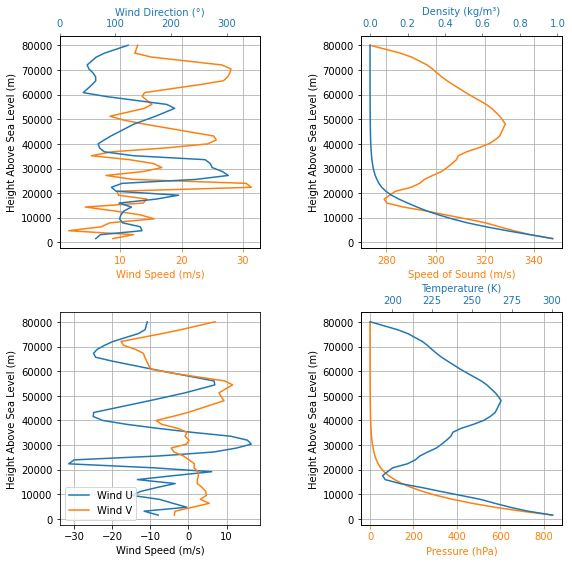

In [4]:
Env.allInfo()

In [5]:
# help(SolidMotor)

In [6]:
motor = SolidMotor(
    thrustSource="march_03.csv",
    burnOut=3,
    grainNumber=1,
    grainSeparation=0.001,
    grainDensity=500,
    grainOuterRadius=0.05,
    grainInitialInnerRadius=0.019,
    grainInitialHeight=0.106,
    nozzleRadius=0.025,
    throatRadius=0.012
)

In [7]:
# Calculates total impulse by numerical integration of the thrust curve
motor.evaluateTotalImpulse()

200.60570778750002

Nozzle Details
Nozzle Radius: 0.025 m
Nozzle Throat Radius: 0.012 m

Grain Details
Number of Grains: 1
Grain Spacing: 0.001 m
Grain Density: 500 kg/m3
Grain Outer Radius: 0.05 m
Grain Inner Radius: 0.019 m
Grain Height: 0.106 m
Grain Volume: 0.001 m3
Grain Mass: 0.356 kg

Motor Details
Total Burning Time: 3 s
Total Propellant Mass: 0.356 kg
Propellant Exhaust Velocity: 563.257 m/s
Average Thrust: 66.869 N
Maximum Thrust: 159.409557 N at 1.35 s after ignition.
Total Impulse: 200.606 Ns

Plots


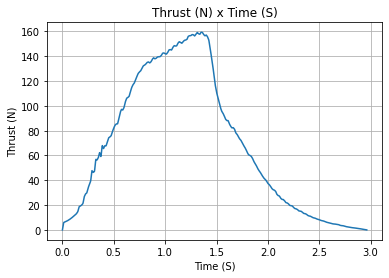

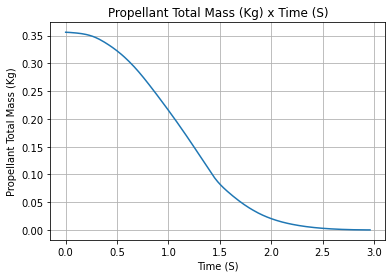

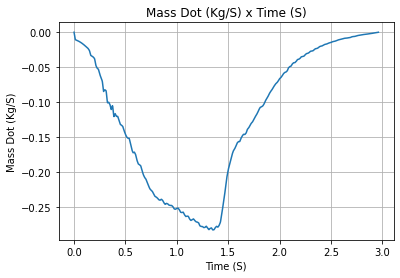

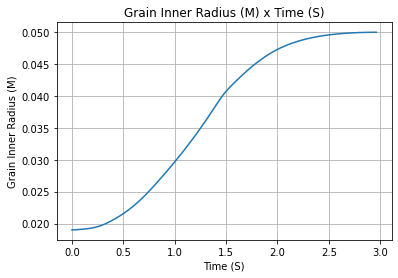

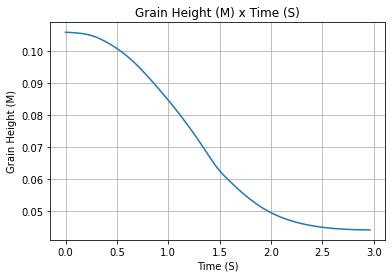

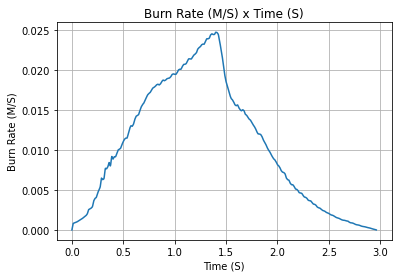

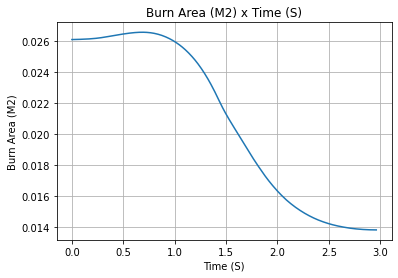

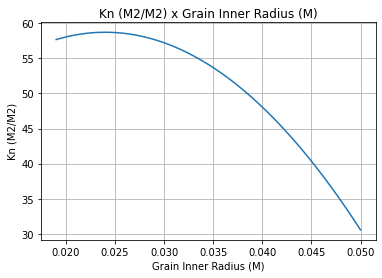

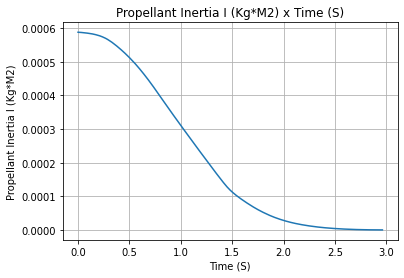

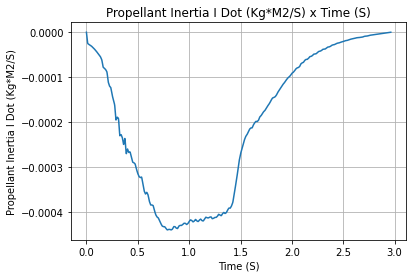

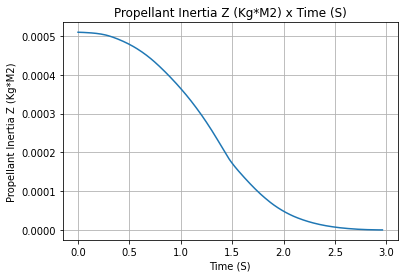

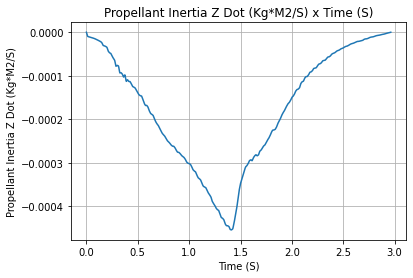

In [10]:
motor.allInfo()

In [11]:
# help(Rocket)

In [16]:
Nakuja = Rocket(
    motor=motor,
    radius=0.06,
    mass=2.269,
    inertiaI=0.2175,
    inertiaZ=0.00173,
    distanceRocketNozzle=-0.411,
    distanceRocketPropellant=-0.361,
    powerOffDrag=0.675,
    powerOnDrag=0.675
)

Nakuja.setRailButtons([0.2, -0.5])

In [17]:
NoseCone = Nakuja.addNose(length=0.18, kind="ogive", distanceToCM=0.437)

FinSet = Nakuja.addFins(3, span=0.065, rootChord=0.1, tipChord=0.028, distanceToCM=-0.411, cantAngle=0)

In [19]:
def drogueTrigger(p, y):
    # p = pressure
    # y = [x, y, z, vx, vy, vz, e0, e1, e2, e3, w1, w2, w3]
    # activate drogue when vz < 0 m/s.
    return True if y[5] < 0 else False


# Nakuja.parachutes.remove(Drogue)

Drogue = Nakuja.addParachute("Drogue", CdS=1.6, trigger=drogueTrigger, samplingRate=40, lag=2, noise=(0, 8.3, 0.5))


In [20]:
TestFlight = Flight(rocket=Nakuja, environment=Env, inclination=85, heading=0, verbose=True)

Simulation Completed at Time: 23.5121 s


In [21]:
TestFlight.printInitialConditionsData()

Position - x: 0.00 m | y: 0.00 m | z: 1553.46 m
Velocity - Vx: 0.00 m/s | Vy: 0.00 m/s | Vz: 0.00 m/s
Attitude - e0: 0.999 | e1: -0.044 | e2: -0.000 | e3: 0.000
Euler Angles - Spin φ : 0.00° | Nutation θ: -5.00° | Precession ψ: 0.00°
Angular Velocity - ω1: 0.00 rad/s | ω2: 0.00 rad/s| ω3: 0.00 rad/s


Initial Conditions

Position - x: 0.00 m | y: 0.00 m | z: 1553.46 m
Velocity - Vx: 0.00 m/s | Vy: 0.00 m/s | Vz: 0.00 m/s
Attitude - e0: 0.999 | e1: -0.044 | e2: -0.000 | e3: 0.000
Euler Angles - Spin φ : 0.00° | Nutation θ: -5.00° | Precession ψ: 0.00°
Angular Velocity - ω1: 0.00 rad/s | ω2: 0.00 rad/s| ω3: 0.00 rad/s


Launch Rail Orientation

Launch Rail Inclination: 85.00°
Launch Rail Heading: 0.00°


Surface Wind Conditions

Frontal Surface Wind Speed: -3.72 m/s
Lateral Surface Wind Speed: 7.94 m/s


 Rail Departure State

Rail Departure Time: 0.910 s
Rail Departure Velocity: 18.005 m/s
Rail Departure Static Margin: -0.490 c
Rail Departure Angle of Attack: 25.695°
Rail Departure Thrust-Weight Ratio: 5.627
Rail Departure Reynolds Number: 1.286e+05


BurnOut State

BurnOut time: 3.000 s
Altitude at burnOut: 87.673 m (AGL)
Rocket velocity at burnOut: 29.113 m/s
Freestream velocity at burnOut: 26.222 m/s
Mach Number at burnOut: 0.076
Kinetic energy at burnOut: 9.620e+02 J


Apogee

Ap

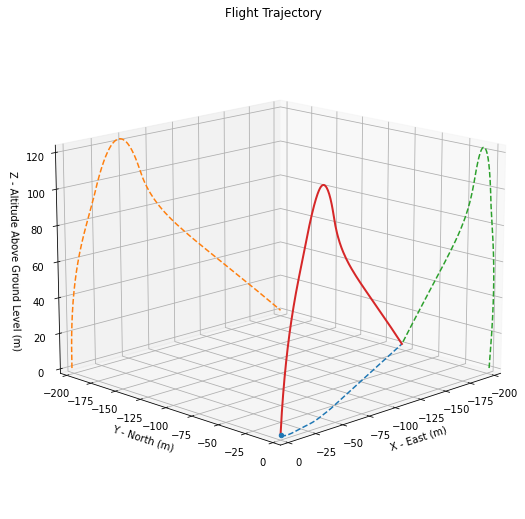



Trajectory Kinematic Plots



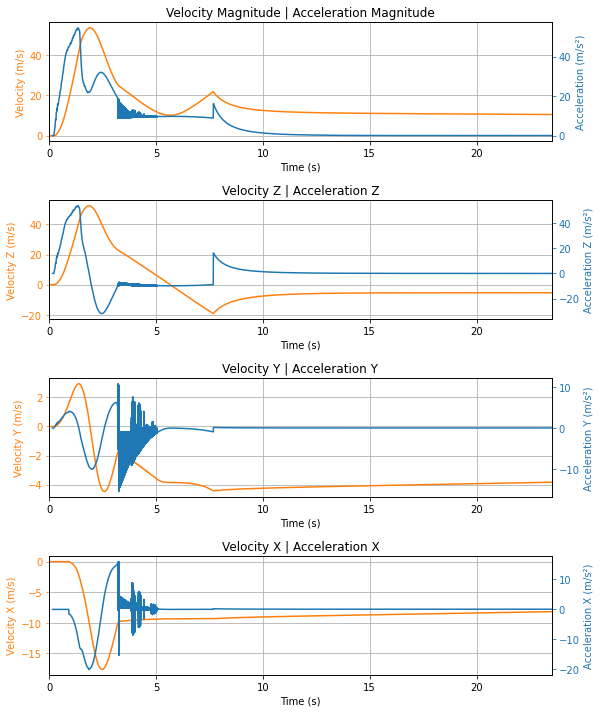



Angular Position Plots



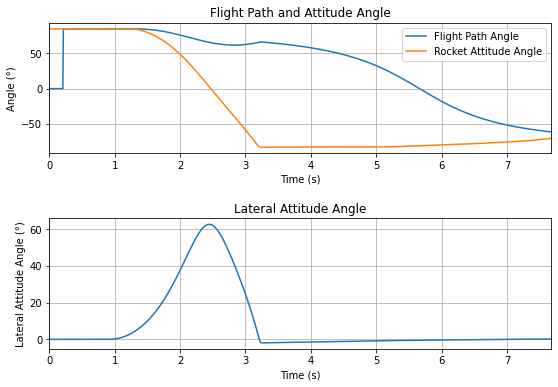



Path, Attitude and Lateral Attitude Angle plots



C:\Users\0x6f736f646f\OneDrive\Documents\Nakuja\airframeN2\Venv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


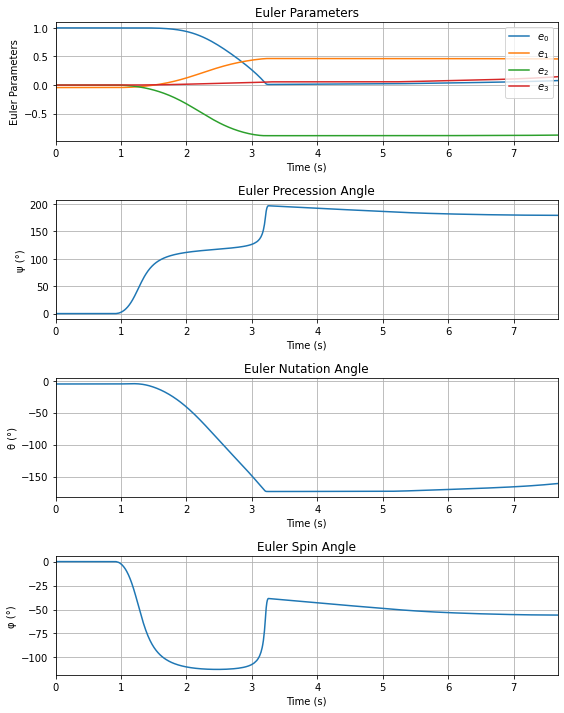



Trajectory Angular Velocity and Acceleration Plots



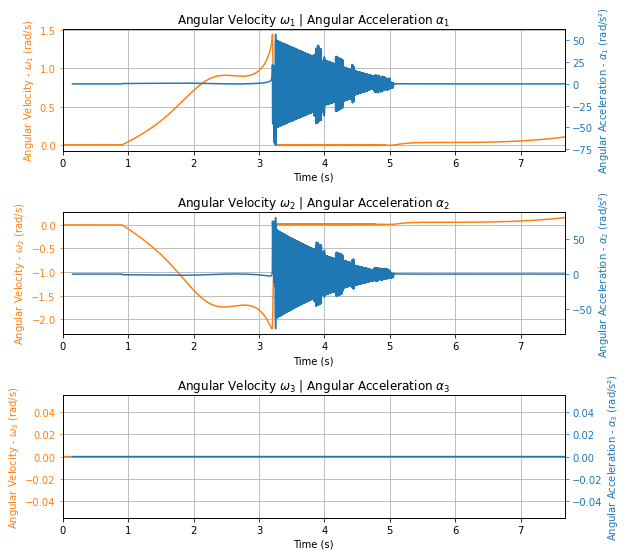



Trajectory Force Plots



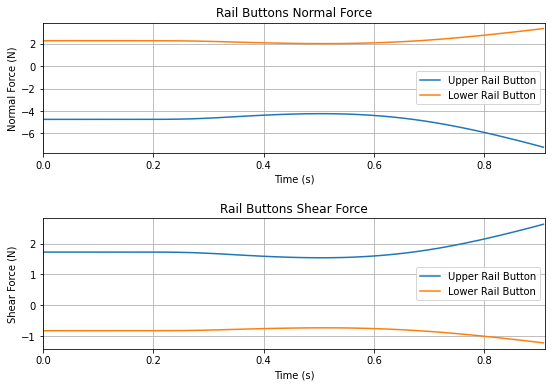

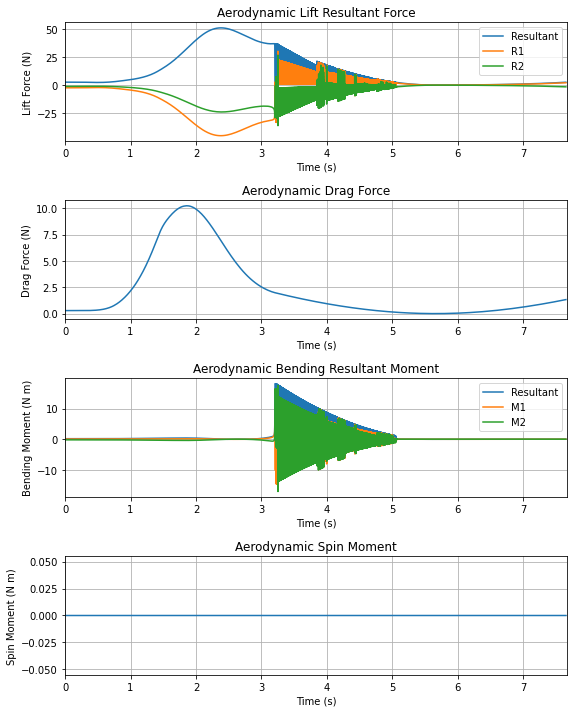



Trajectory Energy Plots



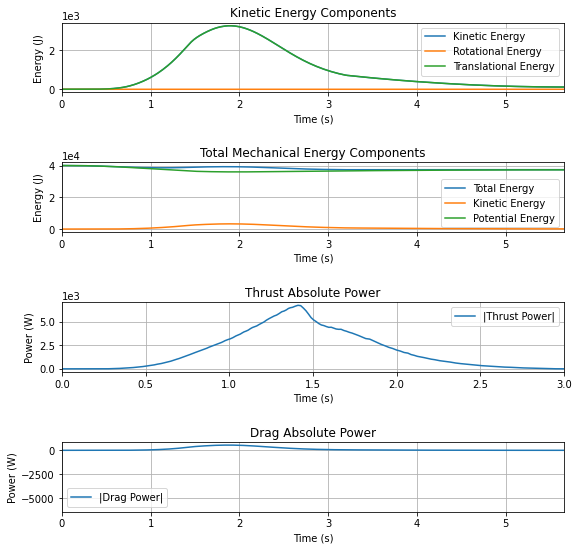



Trajectory Fluid Mechanics Plots



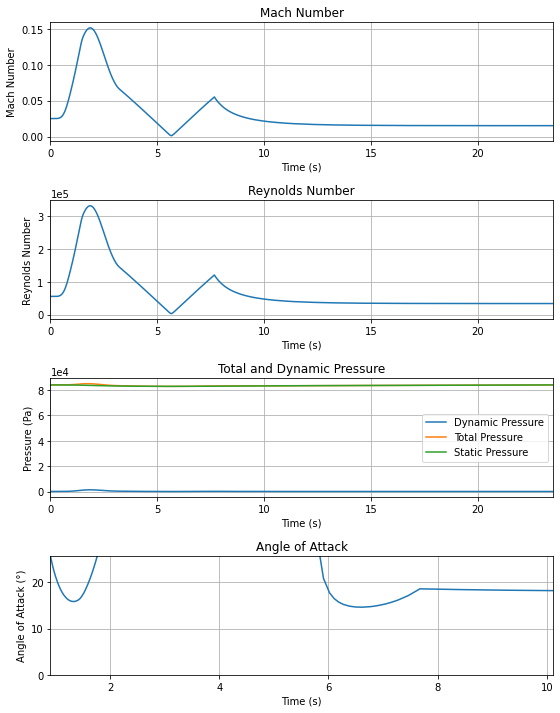



Trajectory Stability and Control Plots



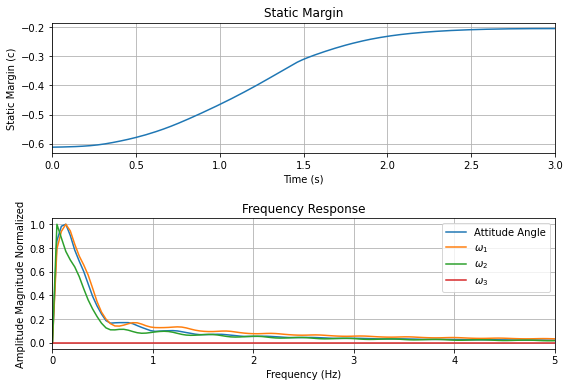

In [22]:
TestFlight.allInfo()
